![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Character Recognition using Fourier Descriptors



In [ ]:
!git clone https://github.com/domingomery/balu3
!pip install ./balu3

Cloning into 'balu3'...
remote: Enumerating objects: 261, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 261 (delta 152), reused 177 (delta 74), pack-reused 0
Receiving objects: 100% (261/261), 68.46 KiB | 5.27 MiB/s, done.
Resolving deltas: 100% (152/152), done.
Processing ./balu3
  Preparing metadata (setup.py) ... done
  Created wheel for balu3: filename=balu3-1.0-py3-none-any.whl size=43704 sha256=8547adb88cd4ccaf9b146ff08454a25154bad58ba4c5e694869cd0e46c482282
  Stored in directory: /tmp/pip-ephem-wheel-cache-qitpjuv5/wheels/9e/f6/a9/3d39da83a3504331129d706f5b04ceb3dbf0ec0f313cdb8fcf
Successfully built balu3


## Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from balu3.fx.geo   import fourierdes    # Fourier Descriptors
from balu3.fx.geo   import efourierdes   # Elliptic Fourier Descriptors
from balu3.io.plots import plot_features
from balu3.io.misc  import imageload

# Example: Recognition of 4 characters

In this example, the extraction of features necessary to perform a recognition of the following four characters with different sizes and different orientations is performed.

* Class 0: period '.'

* Class 1: tilde '~'.

* Class 2: asterisk '~'.

* Class 4: comma ','

 The Fourier descriptors are used for the solution since they are invariant to rotation and scale.

In this example the classification is not performed, only the extraction of Fourier descriptors is shown.

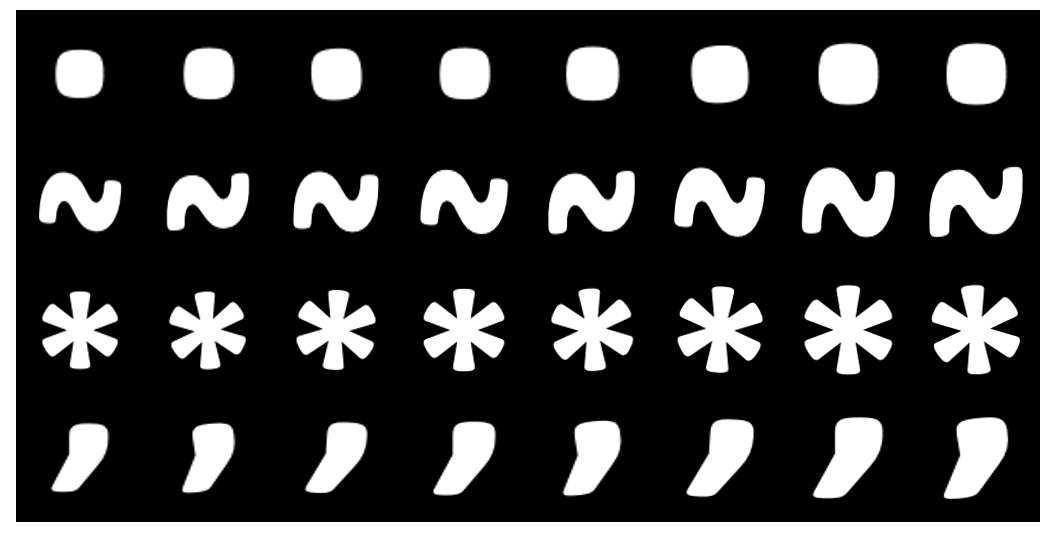

# Database

The database consists of 4 classes and 30 images per class.

In [ ]:
# Carga de base de datos
!wget https://www.dropbox.com/s/xjej18nbub7nq2g/chars.zip
!unzip -qq chars.zip

--2023-07-18 13:54:53--  https://www.dropbox.com/s/xjej18nbub7nq2g/chars.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xjej18nbub7nq2g/chars.zip [following]
--2023-07-18 13:54:53--  https://www.dropbox.com/s/raw/xjej18nbub7nq2g/chars.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2792704b568ffef3ff70010515.dl.dropboxusercontent.com/cd/0/inline/CAFdHYyezPtGoDiONkbk4_j337V1PtZ5lhh_AqhKpJqXzk2xiEFHEDqU3rgPDxf-ecdry8N9pgIzvOBoCFZ6nIU-aRgodg7FNOP__adk64SV7A0_KvFxng2ala2SGmx685lPN6wb3mI-L_RSwknKLY74X0PfmZtDu2D4yYfuunplQg/file# [following]
--2023-07-18 13:54:54--  https://uc2792704b568ffef3ff70010515.dl.dropboxusercontent.com/cd/0/inline/CAFdHYyezPtGoDiONkbk4_j337V1PtZ5lhh_AqhKpJqXzk2xiEFHEDqU3rgPDxf-ecdry8N9pgIzvOBoCFZ6nIU-a

# Feature Extraction

In [ ]:
K = 4  # número de clases
N = 30 # número de imágenes por clase

order = 10
M  = 16            # numero de descriptores
#M  = order*4       # numero de descriptores elipticos

X = np.zeros((K*N,M))               # K x N muestras (filas), y M características (columnas)
y = np.zeros((K*N,))                # ground truth (clasificacion ideal)

t = 0
for j in range(K):                  # para cada clase
  for i in range(N):                # para cada imagen de la clase
    # Lectura de la imagen
    img    = imageload('chars/char_',j+1,2,i+1,3,echo='on')
    # Extracción de características
    R      = (img>0.5)*1             # segmentation
    f = fourierdes(R)                # fourier descriptors
    #f = efourierdes(R,order=order)   # elliptic fourier descriptors
    f = f/np.linalg.norm(f)          # normalizacion

    X[t,:] = f
    y[t] = j
    t = t+1


loading image chars/char_01_001.png...
loading image chars/char_01_002.png...
loading image chars/char_01_003.png...
loading image chars/char_01_004.png...
loading image chars/char_01_005.png...
loading image chars/char_01_006.png...
loading image chars/char_01_007.png...
loading image chars/char_01_008.png...
loading image chars/char_01_009.png...
loading image chars/char_01_010.png...
loading image chars/char_01_011.png...
loading image chars/char_01_012.png...
loading image chars/char_01_013.png...
loading image chars/char_01_014.png...
loading image chars/char_01_015.png...
loading image chars/char_01_016.png...
loading image chars/char_01_017.png...
loading image chars/char_01_018.png...
loading image chars/char_01_019.png...
loading image chars/char_01_020.png...
loading image chars/char_01_021.png...
loading image chars/char_01_022.png...
loading image chars/char_01_023.png...
loading image chars/char_01_024.png...
loading image chars/char_01_025.png...
loading image chars/char_

# Visualization

Fourier Descriptor : (1, 4)


/usr/local/lib/python3.10/dist-packages/balu3/io/plots.py:191: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[d==j,0],X[d==j,1],label='Class '+str(j),cmap=plt.cm.autumn,s=17)


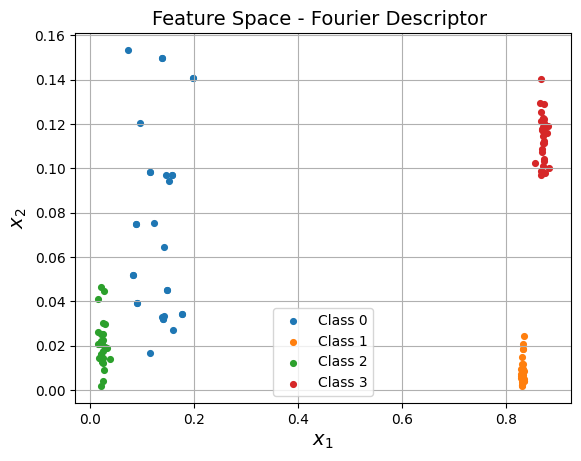

In [ ]:
f1 = 1  # Fourier Descriptor f1
f2 = 4  # Fourier Descriptor  f2

print('Fourier Descriptor : '+str((f1,f2)))

Xs = X[:,[f1,f2]]

plot_features(Xs,y,'Fourier Descriptor ',show=1)


From the above graph, one can think that a classifier could work correctly using thresholds for x1 and for x2.


# Similarity matrix

Since each character has been described as a vector (of 16 elements) of norm one, a dot product of all with all can be performed. In this way products that are close to 1 indicate that these vectors are similar.

In this example, in the 120x16 element matrix X, there are 30 vectors for each character, so dot products between vectors of the same class should give values close to 1 (the whole diagonal is 1.0), while dot products of vectors between different classes should give values much smaller than 1. It is observed that class 3 with class 1, however, gives similar vectors (the dot product is about 0.84).

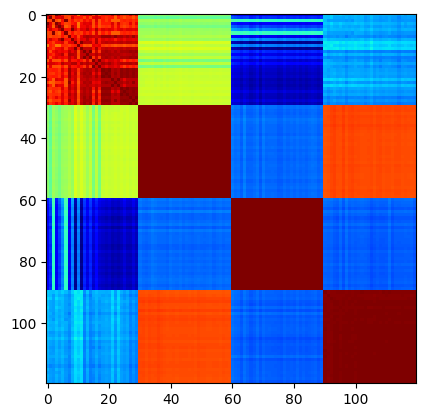

In [ ]:
D      = np.dot(X,X.T)
fig    = plt.figure()
ax     = fig.add_subplot(111)
implot = plt.imshow(D,cmap='jet')

In this heat map, colors close to red indicate values close to 1, while colors close to blue indicate values close to 0.

A classifier could be designed using nearest neighbors, i.e. for a new testing image, the Fourier vector normalized to 1 is extracted, the dot product is done with all the rows of X and that class is chosen from the k most similar samples of X with the most votes.